In [143]:
# Library Import

import math
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import confusion_matrix, make_scorer, classification_report, accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline

In [144]:
# Dataset Add

location = '/content/drive/My Drive/dataset/data.csv'

In [145]:
# Mounting Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
# Dataset Read

f = pd.read_csv(location)
data = pd.DataFrame(f)

In [147]:
# Rows and Columns

f.shape

(1000, 12)

In [148]:
# Print Dataset

data.head(1000)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,2
996,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,2
997,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,2
998,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,2


In [149]:
# Missing Values Before Preprocessing

missing_values_per_column = f.isnull().sum()
print("Missing values per column:")
print(missing_values_per_column)

Missing values per column:
Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
CLASS     0
dtype: int64


In [150]:
# Normalizing Data

def normalize_data(data):
    data = np.array(data)
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    if(min_vals==max_vals):
      return data
    else:
      normalized_data = (data - min_vals) / (max_vals - min_vals)
      return normalized_data.tolist()

In [151]:
# Removing Outlier Using Interquartile Range

def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    cleaned_series = series[(series >= lower_bound) & (series <= upper_bound)]
    return cleaned_series

In [152]:
# Data Type Of Each Column

print(data.dtypes)

Gender      int64
AGE         int64
Urea      float64
Cr          int64
HbA1c     float64
Chol      float64
TG        float64
HDL       float64
LDL       float64
VLDL      float64
BMI       float64
CLASS       int64
dtype: object


In [153]:
# Setting Up Columns For Preprocessing

cols_clean = ['Gender','AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS']
norm = ['Gender','AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

In [154]:
# Convert Columns To Numeric From Non-Numeric Values

data[cols_clean] = data[cols_clean].apply(pd.to_numeric, errors='coerce')

In [155]:
# Removing Outliers, Removing Missing values and Normalization

series = data
for col in norm:
    data[col] = remove_outliers(data[col])

for col in cols_clean:
    col_mean = data[col].mean(skipna=True)
    data[col] = data[col].fillna(col_mean)

for col in norm:
    data[col] = normalize_data(data[col])

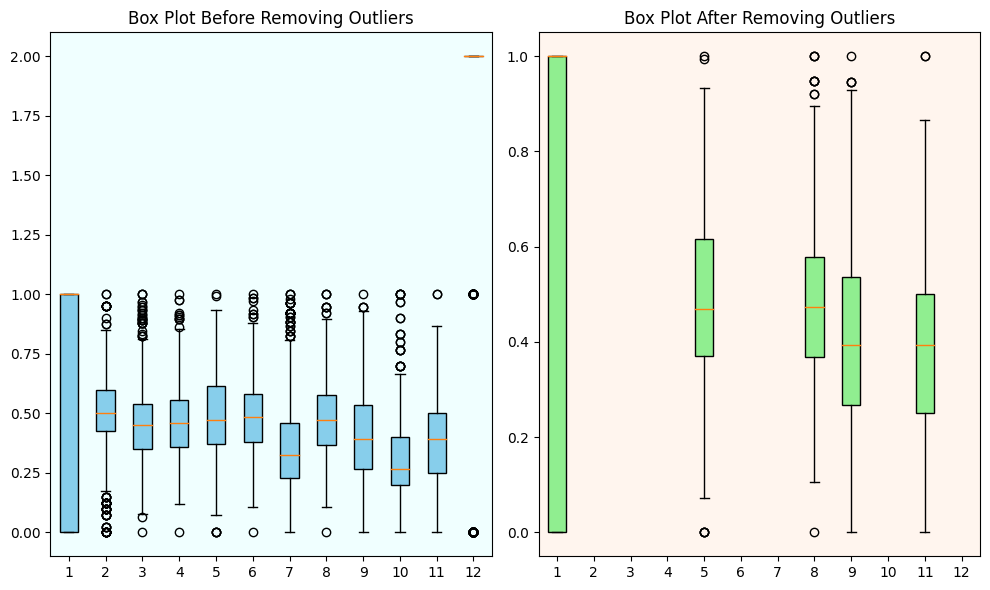

In [156]:
# Box Plotting of Before and After Removing Outliers

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.gca().set_facecolor('#F0FFFF')
plt.boxplot(series, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plot Before Removing Outliers')

# After removing outliers
cleaned_series = remove_outliers(series)
plt.subplot(1, 2, 2)
plt.gca().set_facecolor('#FFF5EE')
plt.boxplot(cleaned_series, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Box Plot After Removing Outliers')

plt.tight_layout()
plt.show()

In [157]:
# Checking Missing Data After Processing

missing_data = data[cols_clean].isnull().sum()
print("Missing data after processing:")
print(missing_data)

Missing data after processing:
Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
CLASS     0
dtype: int64


In [158]:
# Droping And Using CLASS Column For Future Testing And Evaluating

X= f.drop(columns = 'CLASS',axis=1)
y=f['CLASS']

In [159]:
# Spliting Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

a = len(X_train)
b = len(X_test)
print(' Training data =',a,'\n','Testing data =',b,'\n','Total data length = ',a+b)

 Training data = 700 
 Testing data = 300 
 Total data length =  1000


In [160]:
# Feature Importance Plot

def plot_feature_importances(model, feature_names):
    # Get feature importances from the model
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(len(feature_names)), importances[indices], align="center")
    plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
    plt.xlim([-1, len(feature_names)])
    plt.gca().set_facecolor('#C0C0C0')
    plt.grid(True, linestyle='--', alpha=0.7, color='black')
    plt.xticks(fontsize=10, color='blue')
    plt.yticks(fontsize=12, color='black')
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.show()

In [161]:
# KNN Algorithm

def knn(x_train, y_train, x_test, y_test, n, m):
    n_range = range(n, m + 1, 1)
    best_accuracy, best_k, best_cf, best_classifier = 0, 0, np.zeros((2, 2), dtype=int), None
    for n_neighbors in n_range:
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(x_train, y_train)
        predict_y = knn.predict(x_test)
        accuracy = accuracy_score(y_test, predict_y)
        matrix = confusion_matrix(y_test, predict_y)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = n_neighbors
            best_cf = matrix
            best_classifier = knn
    return best_accuracy, best_k, best_cf, best_classifier

In [162]:
# Gausian Naive Bayes Algorithm

def naive_bayes(train_data, train_labels, test_data, test_labels):
    nb_classifier = GaussianNB()
    nb_classifier.fit(train_data, train_labels)
    predicted_labels = nb_classifier.predict(test_data)
    accuracy = accuracy_score(test_labels, predicted_labels)
    confusion_mat = confusion_matrix(test_labels, predicted_labels)
    return accuracy, confusion_mat, nb_classifier

In [163]:
# Logistic Regression Algorithm

def logistic_regression(train_data, train_labels, test_data, test_labels):
    lr_classifier = LogisticRegression(max_iter=10000)
    lr_classifier.fit(train_data, train_labels)
    predicted_labels = lr_classifier.predict(test_data)
    accuracy = accuracy_score(test_labels, predicted_labels)
    confusion_mat = confusion_matrix(test_labels, predicted_labels)
    return accuracy, confusion_mat, lr_classifier

In [164]:
# Decision Tree Algorithm

def decision_tree(train_data, train_labels, test_data, test_labels):
    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(train_data, train_labels)
    predicted_labels = dt_classifier.predict(test_data)
    accuracy = accuracy_score(test_labels, predicted_labels)
    confusion_mat = confusion_matrix(test_labels, predicted_labels)
    return accuracy, confusion_mat, dt_classifier

In [165]:
# Random Forest Algorithm

def random_forest(train_data, train_labels, test_data, test_labels):
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(train_data, train_labels)
    predicted_labels = rf_classifier.predict(test_data)
    accuracy = accuracy_score(test_labels, predicted_labels)
    confusion_mat = confusion_matrix(test_labels, predicted_labels)
    return accuracy, confusion_mat, rf_classifier

In [166]:
# SVM Algorithm

def svm(train_data, train_labels, test_data, test_labels):
    svm_classifier = SVC()
    svm_classifier.fit(train_data, train_labels)
    predicted_labels = svm_classifier.predict(test_data)
    accuracy = accuracy_score(test_labels, predicted_labels)
    confusion_mat = confusion_matrix(test_labels, predicted_labels)
    return accuracy, confusion_mat, svm_classifier

In [167]:
# Xgboost Algorithm

def xgboost(train_data, train_labels, test_data, test_labels):
    xgb_classifier = XGBClassifier()
    xgb_classifier.fit(train_data, train_labels)
    predicted_labels = xgb_classifier.predict(test_data)
    accuracy = accuracy_score(test_labels, predicted_labels)
    confusion_mat = confusion_matrix(test_labels, predicted_labels)
    return accuracy, confusion_mat, xgb_classifier

In [168]:
# Cross Validation Function

def crossv(classifier, X, y, cvv):
    cv_results = cross_validate(classifier, X, y, cv=cvv, scoring={'accuracy': 'accuracy',
                                                                   'precision': make_scorer(precision_score, zero_division=1, average='macro'),
                                                                   'recall': make_scorer(recall_score, zero_division=1, average='macro'),
                                                                   'f1': make_scorer(f1_score, zero_division=1, average='macro')})
    accuracy_scores = cv_results['test_accuracy']
    precision_scores = cv_results['test_precision']
    recall_scores = cv_results['test_recall']
    f1_scores = cv_results['test_f1']

    mean_accuracy = np.mean(accuracy_scores)
    mean_precision = np.mean(precision_scores)
    mean_recall = np.mean(recall_scores)
    mean_f1 = np.mean(f1_scores)
    y_pred = cross_val_predict(classifier, X, y, cv=cvv)
    conf_mat = confusion_matrix(y, y_pred)

    print("=== Cross-Validation Results ===")
    print(f"Mean Accuracy: {mean_accuracy:.4f}")
    print(f"Mean Precision: {mean_precision:.4f}")
    print(f"Mean Recall: {mean_recall:.4f}")
    print(f"Mean F1 Score: {mean_f1:.4f}")
    print("\n")
    print("=== Cross-Validation Metrics ===")
    print("Accuracy Scores:", accuracy_scores)
    print("Precision Scores:", precision_scores)
    print("Recall Scores:", recall_scores)
    print("F1 Score Scores:", f1_scores)
    print("\n")
    print("=== Confusion Matrix ===")
    print(conf_mat)
    print("\n")
    print("=== Confusion Matrix Heatmap ===")
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print("\n")
    print("=== Learning Curves ===")
    plt.figure(figsize=(8, 6))
    estimator = classifier
    title = "Learning Curves"
    plot_learning_curve(estimator, title, X_train, y_train, cv=cvv)
    plt.show()
    return mean_accuracy

In [169]:
# Plot Learning Function

def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

KNN Best K : 
9


KNN Accuracy : 
0.9166666666666666


KNN Confusion Matrix : 
[[ 24   3   9]
 [  5   4   1]
 [  5   2 247]]


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.67      0.69        36
           1       0.44      0.40      0.42        10
           2       0.96      0.97      0.97       254

    accuracy                           0.92       300
   macro avg       0.70      0.68      0.69       300
weighted avg       0.91      0.92      0.91       300



KNN Confusion Matrix Heatmap : 



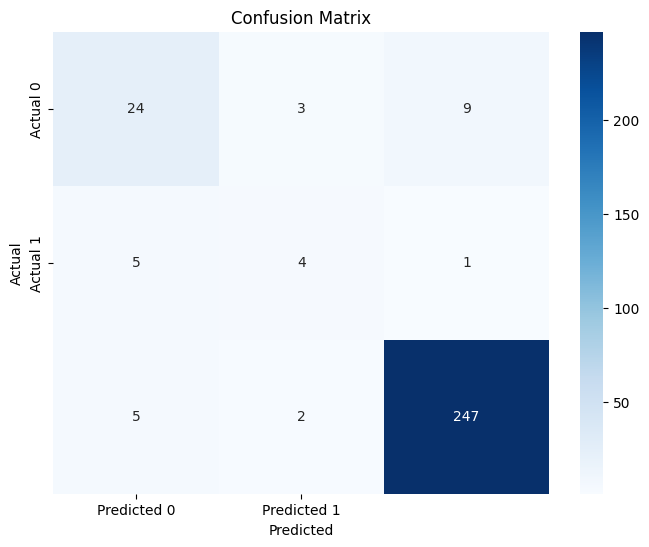

In [170]:
# KNN (With A Loop To Get The Max Accuracy Within The Loop)

n=1
m=10
knnoutput,bestk,knncf,knncl = knn(X_train,y_train,X_test,y_test,n,m)

print("KNN Best K : ")
print(bestk)
print("\n")

print("KNN Accuracy : ")
print(knnoutput)
print("\n")

print("KNN Confusion Matrix : ")
print(knncf)
print("\n")

report = classification_report(y_test, knncl.predict(X_test))
print("Classification Report:\n", report)
print("\n")

print("KNN Confusion Matrix Heatmap : \n")
cm=knncf
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

=== Cross-Validation Results ===
Mean Accuracy: 0.8500
Mean Precision: 0.5828
Mean Recall: 0.5249
Mean F1 Score: 0.5347


=== Cross-Validation Metrics ===
Accuracy Scores: [0.85714286 0.87142857 0.88571429 0.81428571 0.81428571 0.87142857
 0.85714286 0.87142857 0.82857143 0.82857143]
Precision Scores: [0.42293907 0.80601093 0.64516129 0.51174863 0.53276836 0.4962963
 0.58888889 0.68632479 0.57539683 0.56245121]
Recall Scores: [0.42292171 0.5901937  0.55387409 0.51937046 0.5256255  0.55447942
 0.57828894 0.5165725  0.49962335 0.48851224]
F1 Score Scores: [0.42212333 0.62222222 0.58451649 0.50875421 0.52735526 0.52205882
 0.56827094 0.56182796 0.52607197 0.50335775]


=== Confusion Matrix ===
[[ 24  10  33]
 [ 12  12  19]
 [ 23   8 559]]


=== Confusion Matrix Heatmap ===


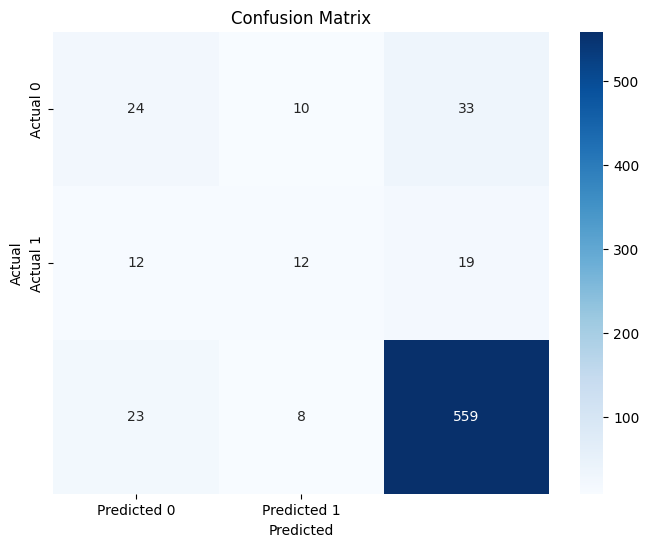



=== Learning Curves ===


<Figure size 800x600 with 0 Axes>

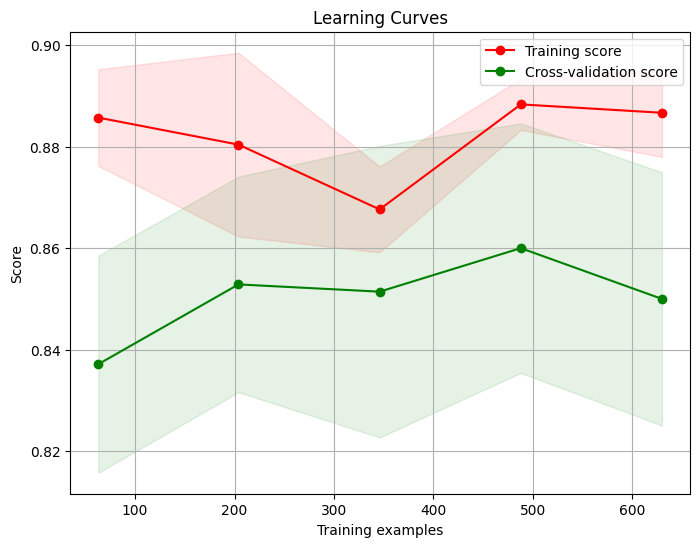

In [171]:
# KNN With 10 Fold Cross Validation

kc= KNeighborsClassifier(9)
mk=crossv(kc,X_train,y_train,10)

Naive Bayes Accuracy : 
0.94


Naive Bayes Confusion Matrix : 
[[ 32   0   4]
 [  0   9   1]
 [ 11   2 241]]


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.89      0.81        36
           1       0.82      0.90      0.86        10
           2       0.98      0.95      0.96       254

    accuracy                           0.94       300
   macro avg       0.85      0.91      0.88       300
weighted avg       0.95      0.94      0.94       300



Naive Bayes Confusion Matrix Heatmap : 



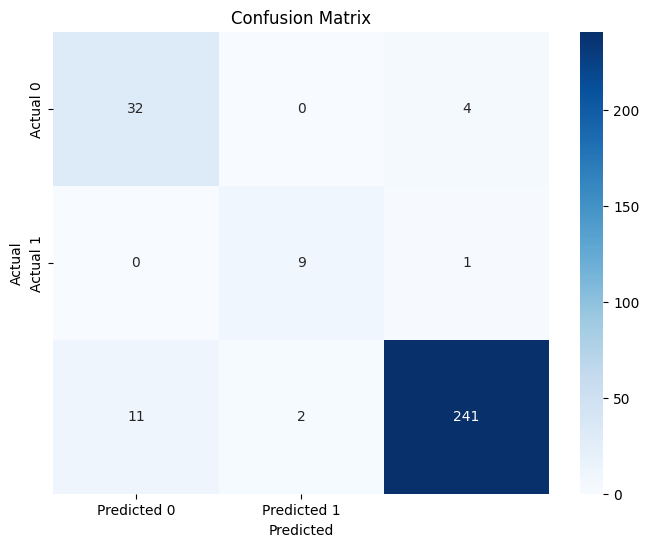

In [172]:
# Naive Bayes

nb_output, nb_cf, nb_classifier = naive_bayes(X_train, y_train, X_test, y_test)

print("Naive Bayes Accuracy : ")
print(nb_output)
print("\n")

print("Naive Bayes Confusion Matrix : ")
print(nb_cf)
print("\n")

report = classification_report(y_test, nb_classifier.predict(X_test))
print("Classification Report:\n", report)
print("\n")

print("Naive Bayes Confusion Matrix Heatmap : \n")
cm = nb_cf
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

=== Cross-Validation Results ===
Mean Accuracy: 0.9314
Mean Precision: 0.8325
Mean Recall: 0.9066
Mean F1 Score: 0.8570


=== Cross-Validation Metrics ===
Accuracy Scores: [0.94285714 0.91428571 0.94285714 0.94285714 0.88571429 0.95714286
 0.87142857 0.97142857 0.92857143 0.95714286]
Precision Scores: [0.82758621 0.79444444 0.928051   0.83333333 0.76037736 0.84126984
 0.69047619 0.94673123 0.81349206 0.88888889]
Recall Scores: [0.89346247 0.96610169 0.81577885 0.97740113 0.91283293 0.94108152
 0.78753027 0.92768362 0.92184557 0.9220339 ]
F1 Score Scores: [0.84786325 0.85738652 0.86434676 0.89244353 0.81634642 0.87996716
 0.7294686  0.93167222 0.85996612 0.89054917]


=== Confusion Matrix ===
[[ 58   2   7]
 [  1  39   3]
 [ 26   9 555]]


=== Confusion Matrix Heatmap ===


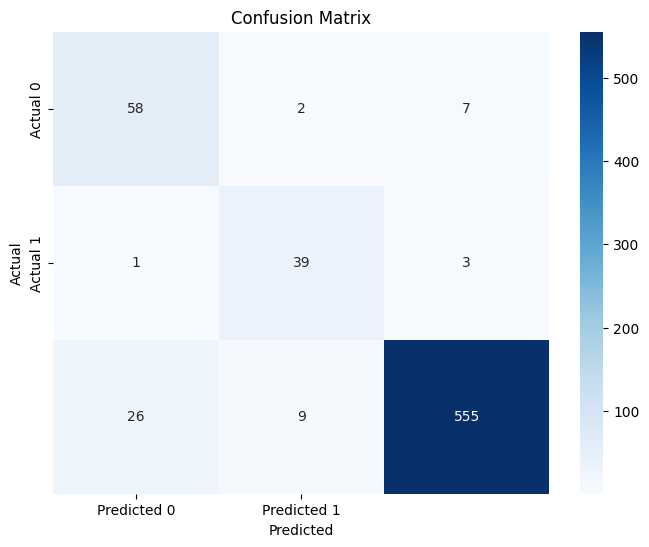



=== Learning Curves ===


<Figure size 800x600 with 0 Axes>

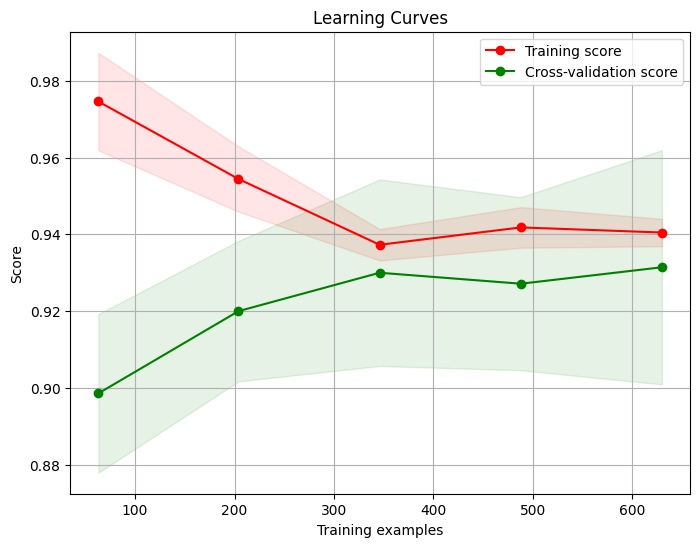

In [173]:
# Naive Bayes With 10 Fold Cross Validation

nbc= GaussianNB()
mn=crossv(nbc,X_train,y_train,10)

#Logistic Regression
Logistic Regression Accuracy : 
0.9433333333333334


Logistic Regression Confusion Matrix : 
[[ 32   2   2]
 [  2   3   5]
 [  4   2 248]]


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86        36
           1       0.43      0.30      0.35        10
           2       0.97      0.98      0.97       254

    accuracy                           0.94       300
   macro avg       0.75      0.72      0.73       300
weighted avg       0.94      0.94      0.94       300



Logistic Regression Confusion Matrix Heatmap : 



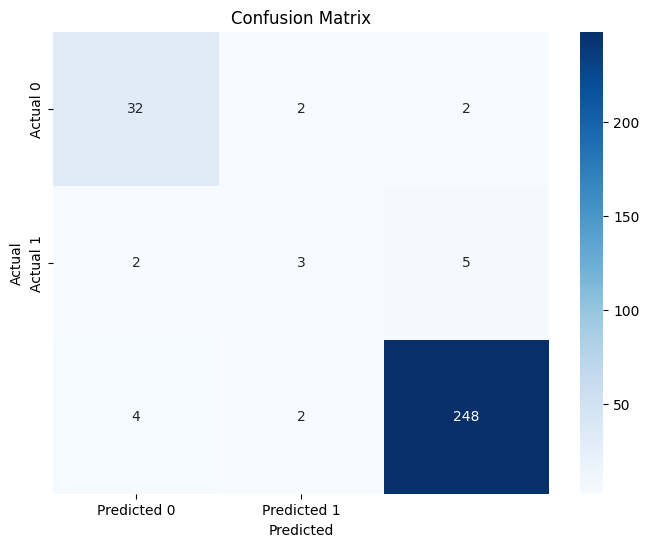

In [174]:
# Logistic Regression

lr_output, lr_cf, lr_classifier = logistic_regression(X_train, y_train, X_test, y_test)

print("#Logistic Regression")
print("Logistic Regression Accuracy : ")
print(lr_output)
print("\n")

print("Logistic Regression Confusion Matrix : ")
print(lr_cf)
print("\n")

report = classification_report(y_test, lr_classifier.predict(X_test))
print("Classification Report:\n", report)
print("\n")

print("Logistic Regression Confusion Matrix Heatmap : \n")
cm = lr_cf
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

=== Cross-Validation Results ===
Mean Accuracy: 0.9071
Mean Precision: 0.7189
Mean Recall: 0.6866
Mean F1 Score: 0.6823


=== Cross-Validation Metrics ===
Accuracy Scores: [0.9        0.9        0.92857143 0.87142857 0.92857143 0.92857143
 0.94285714 0.9        0.85714286 0.91428571]
Precision Scores: [0.55503513 0.5921659  0.90953248 0.66787732 0.76666667 0.79425612
 0.90536723 0.58465608 0.6807152  0.73314501]
Recall Scores: [0.56577885 0.60774818 0.66101695 0.66787732 0.73244552 0.77441485
 0.85774818 0.60546139 0.6606403  0.73314501]
F1 Score Scores: [0.56031746 0.59976387 0.61388889 0.66787732 0.7480069  0.77917676
 0.87441485 0.59471767 0.65213675 0.73314501]


=== Confusion Matrix ===
[[ 53   5   9]
 [  7  13  23]
 [ 13   8 569]]


=== Confusion Matrix Heatmap ===


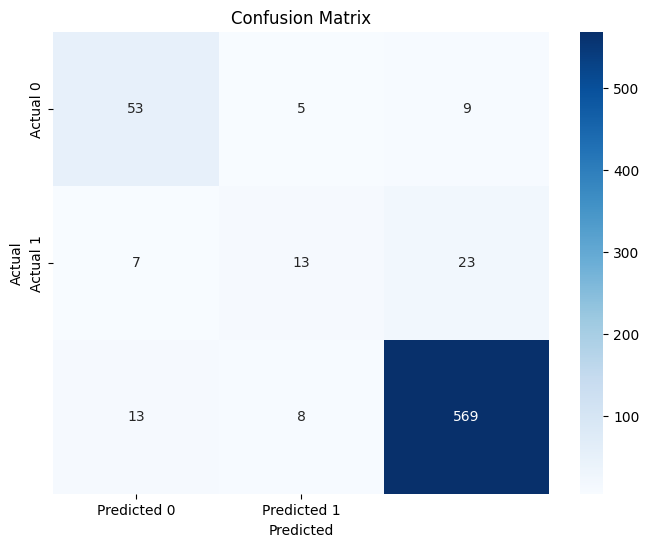



=== Learning Curves ===


<Figure size 800x600 with 0 Axes>

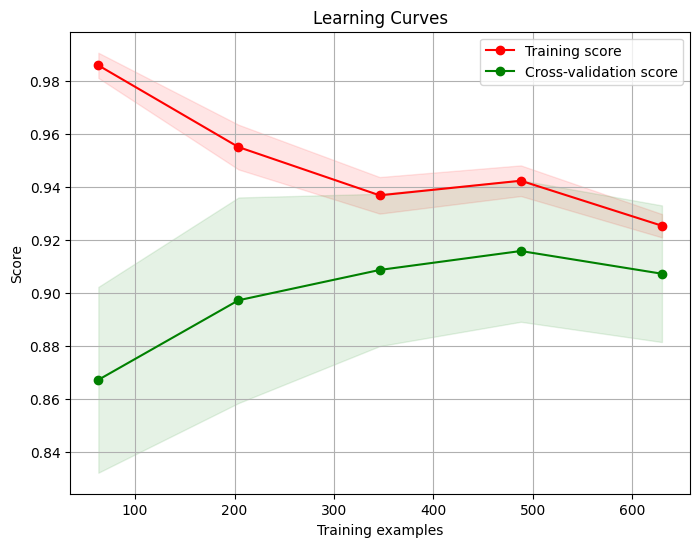

In [175]:
# Logistic Regression With 10 Fold Cross Validation

lr = LogisticRegression(max_iter=10000)
ml=crossv(lr, X_train, y_train, 10)

Decision Tree Accuracy : 
0.99


Decision Tree Confusion Matrix : 
[[ 35   0   1]
 [  0  10   0]
 [  2   0 252]]


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           1       1.00      1.00      1.00        10
           2       1.00      0.99      0.99       254

    accuracy                           0.99       300
   macro avg       0.98      0.99      0.98       300
weighted avg       0.99      0.99      0.99       300



Decision Tree Confusion Matrix Heatmap : 



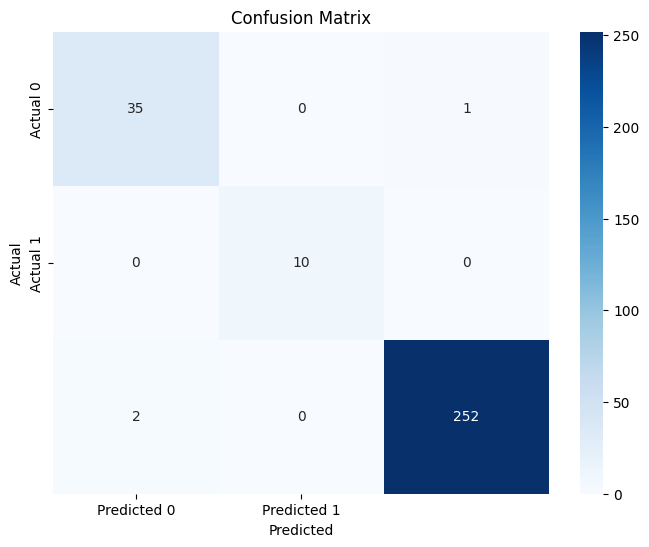



Feature Importance Plot : 


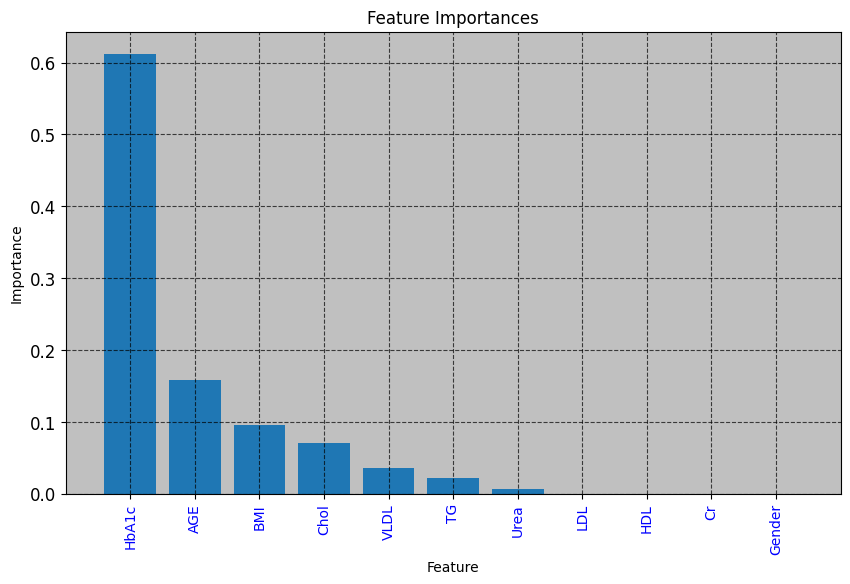

In [176]:
# Decision Tree

dt_output, dt_cf, dt_classifier = decision_tree(X_train, y_train, X_test, y_test)

print("Decision Tree Accuracy : ")
print(dt_output)
print("\n")

print("Decision Tree Confusion Matrix : ")
print(dt_cf)
print("\n")

report = classification_report(y_test, dt_classifier.predict(X_test))
print("Classification Report:\n", report)
print("\n")

print("Decision Tree Confusion Matrix Heatmap : \n")
cm = dt_cf
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("\n")
print("Feature Importance Plot : ")
plot_feature_importances(dt_classifier, norm)


=== Cross-Validation Results ===
Mean Accuracy: 0.9814
Mean Precision: 0.9745
Mean Recall: 0.9431
Mean F1 Score: 0.9541


=== Cross-Validation Metrics ===
Accuracy Scores: [1.         0.97142857 0.98571429 0.98571429 0.97142857 0.95714286
 1.         0.97142857 0.97142857 1.        ]
Precision Scores: [1.         0.95268362 0.99444444 0.99444444 0.89166667 0.98387097
 1.         0.98907104 0.93879473 1.        ]
Recall Scores: [1.         0.91101695 0.95238095 0.95238095 0.98870056 0.82142857
 1.         0.86666667 0.93879473 1.        ]
F1 Score Scores: [1.         0.92450901 0.97155785 0.97155785 0.93499361 0.88856093
 1.         0.91111111 0.93879473 1.        ]


=== Confusion Matrix ===
[[ 62   0   5]
 [  0  40   3]
 [  3   0 587]]


=== Confusion Matrix Heatmap ===


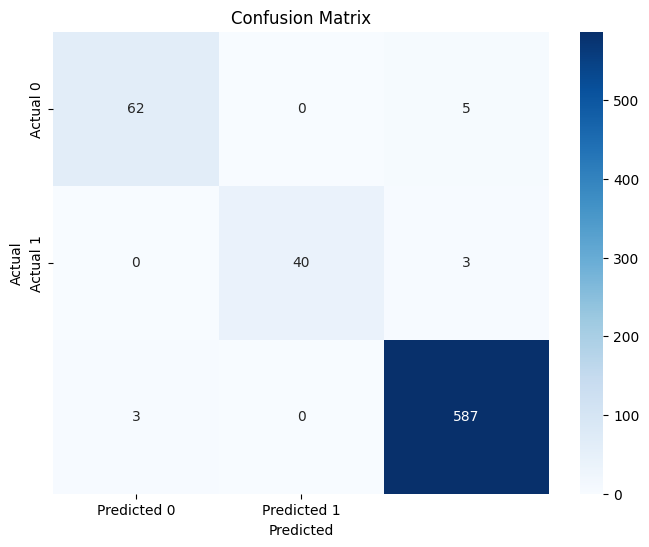



=== Learning Curves ===


<Figure size 800x600 with 0 Axes>

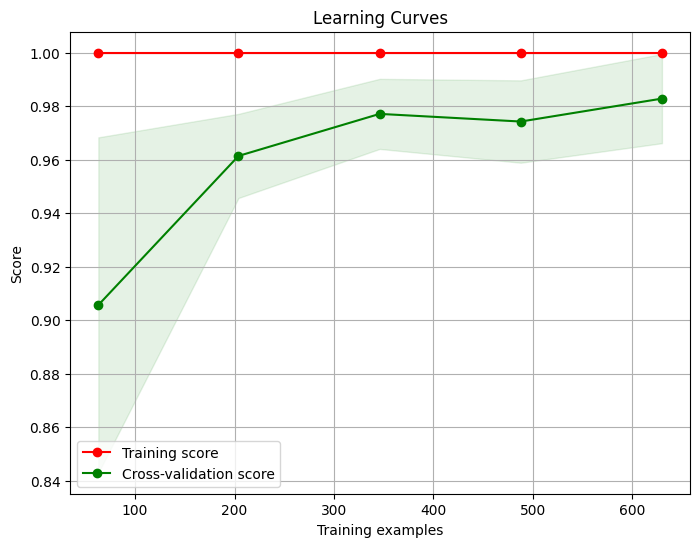

In [177]:
# Decision Tree With 10 Fold Cross Validation

dtc = DecisionTreeClassifier()
md=crossv(dtc,X_train,y_train,10)

#Random Forest
Random Forest Accuracy : 
0.9866666666666667


Random Forest Confusion Matrix : 
[[ 34   0   2]
 [  0   9   1]
 [  1   0 253]]


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96        36
           1       1.00      0.90      0.95        10
           2       0.99      1.00      0.99       254

    accuracy                           0.99       300
   macro avg       0.99      0.95      0.97       300
weighted avg       0.99      0.99      0.99       300



Random Forest Confusion Matrix Heatmap : 



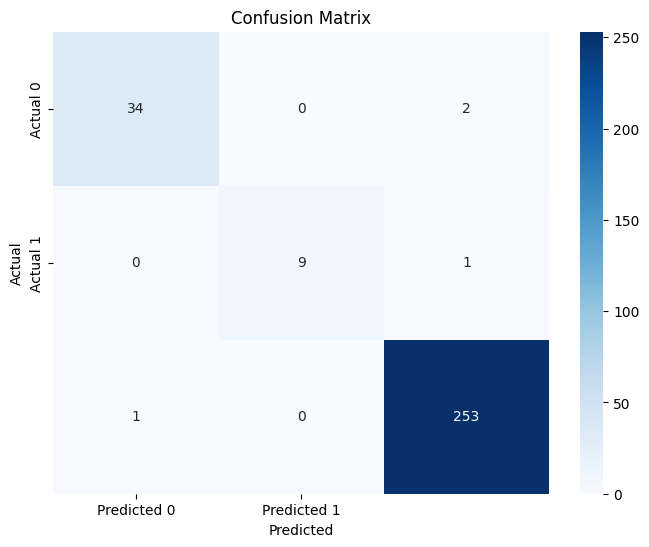



Feature Importance Plot : 


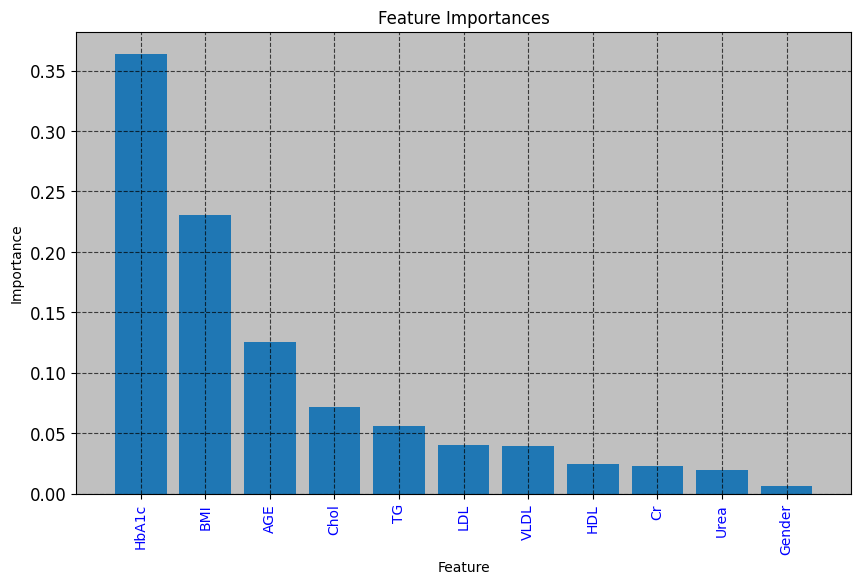

In [178]:
# Random Forest

rf_output, rf_cf, rf_classifier = random_forest(X_train, y_train, X_test, y_test)

print("#Random Forest")
print("Random Forest Accuracy : ")
print(rf_output)
print("\n")

print("Random Forest Confusion Matrix : ")
print(rf_cf)
print("\n")

report = classification_report(y_test, rf_classifier.predict(X_test))
print("Classification Report:\n", report)
print("\n")

print("Random Forest Confusion Matrix Heatmap : \n")
cm = rf_cf
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("\n")
print("Feature Importance Plot : ")
plot_feature_importances(rf_classifier, norm)

=== Cross-Validation Results ===
Mean Accuracy: 0.9814
Mean Precision: 0.9701
Mean Recall: 0.9504
Mean F1 Score: 0.9529


=== Cross-Validation Metrics ===
Accuracy Scores: [0.98571429 1.         1.         0.98571429 0.97142857 0.97142857
 1.         0.95714286 0.95714286 0.98571429]
Precision Scores: [0.99444444 1.         1.         0.99444444 0.92592593 0.98907104
 1.         0.98387097 0.86111111 0.95238095]
Recall Scores: [0.91666667 1.         1.         0.95238095 0.98870056 0.86904762
 1.         0.8        0.98305085 0.99435028]
F1 Score Scores: [0.94957983 1.         1.         0.97155785 0.95258621 0.92118437
 1.         0.84887839 0.91338227 0.97150997]


=== Confusion Matrix ===
[[ 65   0   2]
 [  0  38   5]
 [  5   1 584]]


=== Confusion Matrix Heatmap ===


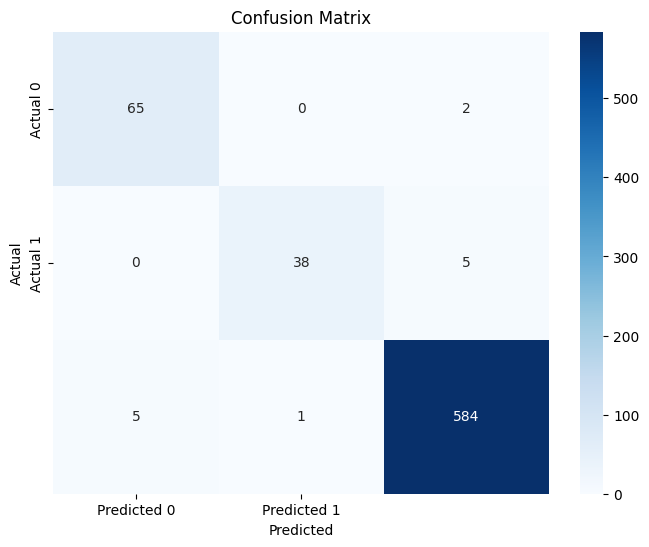



=== Learning Curves ===


<Figure size 800x600 with 0 Axes>

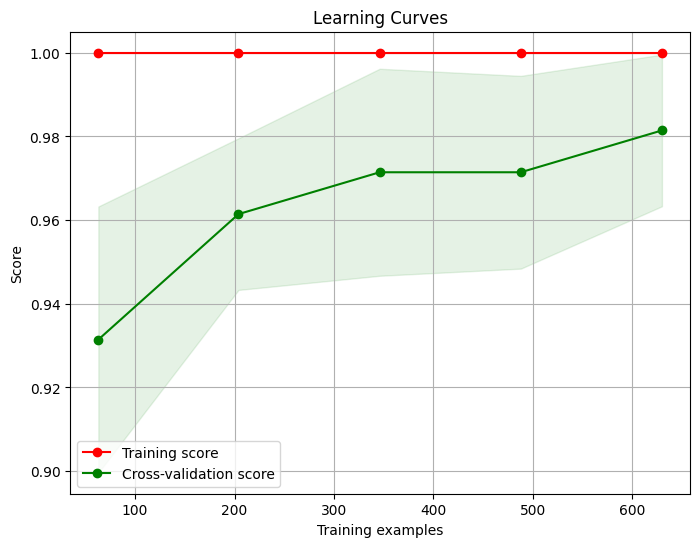

In [179]:
#Random Forest With 10 Fold Cross Validation

rfc= RandomForestClassifier()
mr=crossv(rfc,X_train,y_train,10)

#SVM
SVM Accuracy : 
0.8466666666666667


SVM Confusion Matrix : 
[[  0   0  36]
 [  0   0  10]
 [  0   0 254]]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00        36
           1       1.00      0.00      0.00        10
           2       0.85      1.00      0.92       254

    accuracy                           0.85       300
   macro avg       0.95      0.33      0.31       300
weighted avg       0.87      0.85      0.78       300



SVM Confusion Matrix Heatmap : 



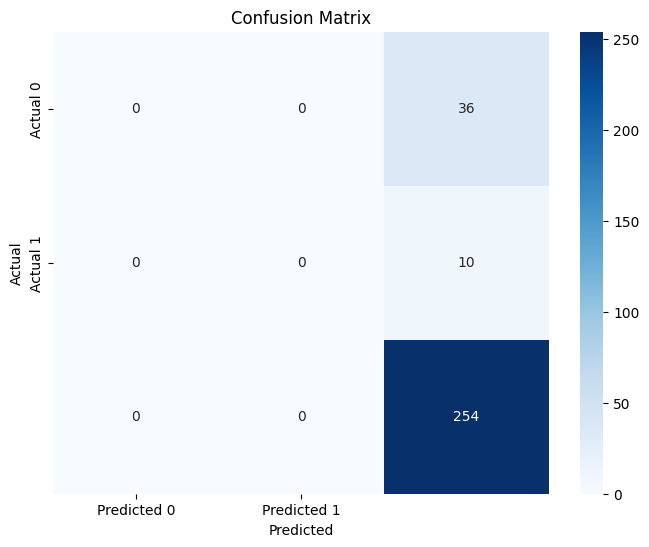

In [180]:
# SVM

svm_output, svm_cf, svm_classifier = svm(X_train, y_train, X_test, y_test)

print("#SVM")
print("SVM Accuracy : ")
print(svm_output)
print("\n")

print("SVM Confusion Matrix : ")
print(svm_cf)
print("\n")

report = classification_report(y_test, svm_classifier.predict(X_test), zero_division=1)
print("Classification Report:\n", report)
print("\n")

print("SVM Confusion Matrix Heatmap : \n")
cm = svm_cf
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

=== Cross-Validation Results ===
Mean Accuracy: 0.8429
Mean Precision: 0.9476
Mean Recall: 0.3333
Mean F1 Score: 0.3049


=== Cross-Validation Metrics ===
Accuracy Scores: [0.84285714 0.84285714 0.84285714 0.84285714 0.84285714 0.84285714
 0.84285714 0.84285714 0.84285714 0.84285714]
Precision Scores: [0.94761905 0.94761905 0.94761905 0.94761905 0.94761905 0.94761905
 0.94761905 0.94761905 0.94761905 0.94761905]
Recall Scores: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]
F1 Score Scores: [0.30490956 0.30490956 0.30490956 0.30490956 0.30490956 0.30490956
 0.30490956 0.30490956 0.30490956 0.30490956]


=== Confusion Matrix ===
[[  0   0  67]
 [  0   0  43]
 [  0   0 590]]


=== Confusion Matrix Heatmap ===


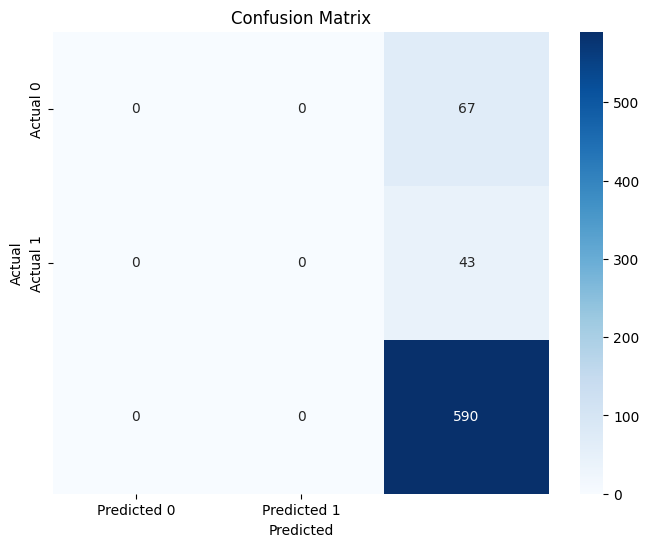



=== Learning Curves ===


<Figure size 800x600 with 0 Axes>

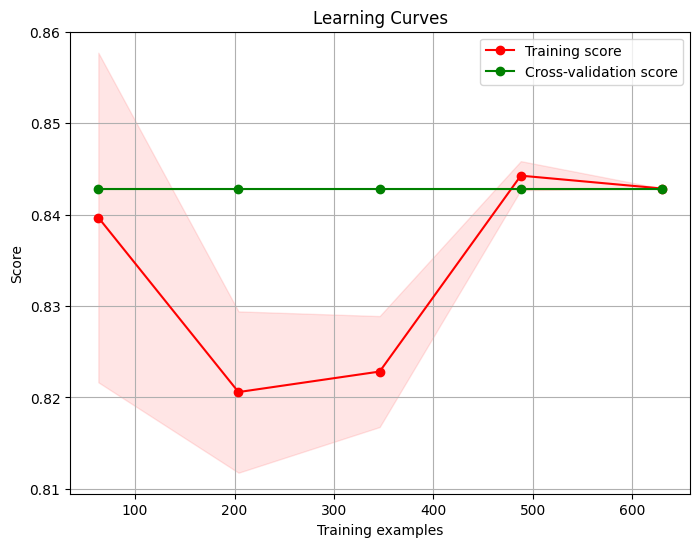

In [181]:
# SVM With 10 Fold Cross Validation

sc= SVC()
ms=crossv(sc,X_train,y_train,10)

#XGBoost
XGBoost Accuracy : 
0.9933333333333333


XGBoost Confusion Matrix : 
[[ 35   0   1]
 [  0  10   0]
 [  1   0 253]]


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00       254

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



XGBoost Confusion Matrix Heatmap : 



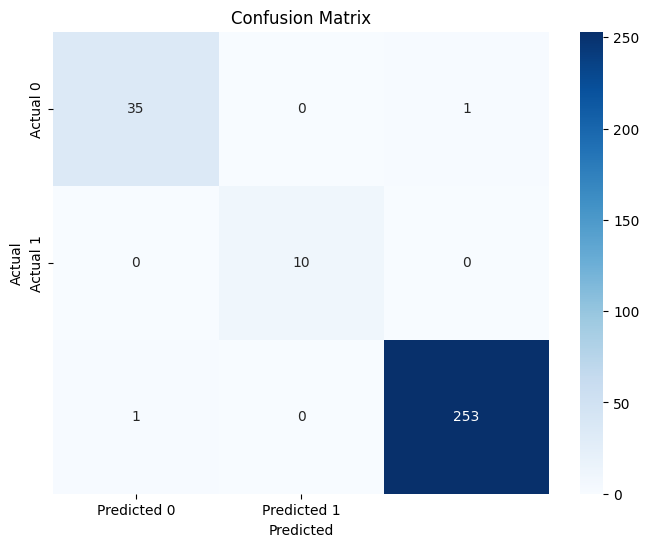

In [182]:
# XGBoost

xgb_output, xgb_cf, xgb_classifier = xgboost(X_train, y_train, X_test, y_test)

print("#XGBoost")
print("XGBoost Accuracy : ")
print(xgb_output)
print("\n")

print("XGBoost Confusion Matrix : ")
print(xgb_cf)
print("\n")

report = classification_report(y_test, xgb_classifier.predict(X_test))
print("Classification Report:\n", report)
print("\n")

print("XGBoost Confusion Matrix Heatmap : \n")
cm = xgb_cf
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

=== Cross-Validation Results ===
Mean Accuracy: 0.9886
Mean Precision: 0.9847
Mean Recall: 0.9690
Mean F1 Score: 0.9746


=== Cross-Validation Metrics ===
Accuracy Scores: [1.         1.         0.98571429 0.98571429 0.98571429 0.97142857
 1.         0.98571429 0.97142857 1.        ]
Precision Scores: [1.         1.         0.99444444 0.99444444 0.95833333 0.98907104
 1.         0.99444444 0.91666667 1.        ]
Recall Scores: [1.         1.         0.95238095 0.95238095 0.99435028 0.86904762
 1.         0.93333333 0.98870056 1.        ]
F1 Score Scores: [1.         1.         0.97155785 0.97155785 0.97492877 0.92118437
 1.         0.96016184 0.94663383 1.        ]


=== Confusion Matrix ===
[[ 64   0   3]
 [  0  41   2]
 [  3   0 587]]


=== Confusion Matrix Heatmap ===


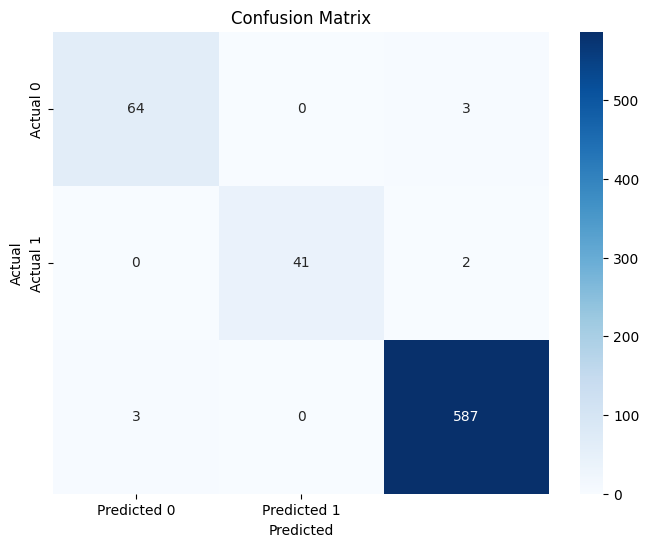



=== Learning Curves ===


<Figure size 800x600 with 0 Axes>

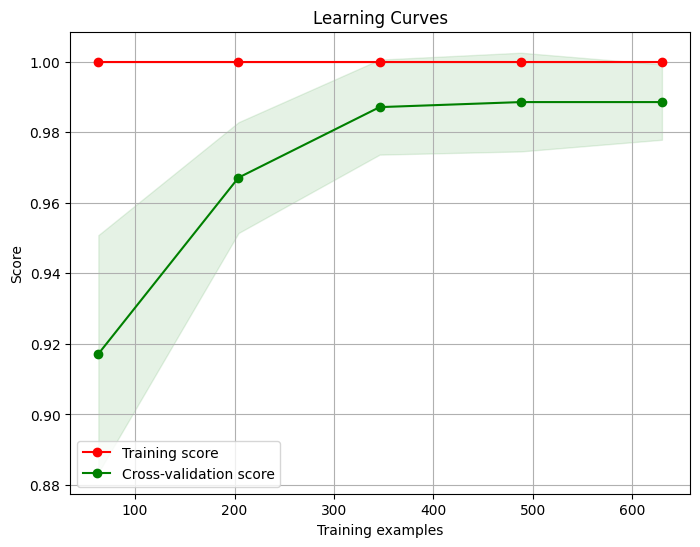

In [183]:
#XGBoost With 10 Fold Cross Validation

xc= XGBClassifier()
mx=crossv(xc,X_train,y_train,10)

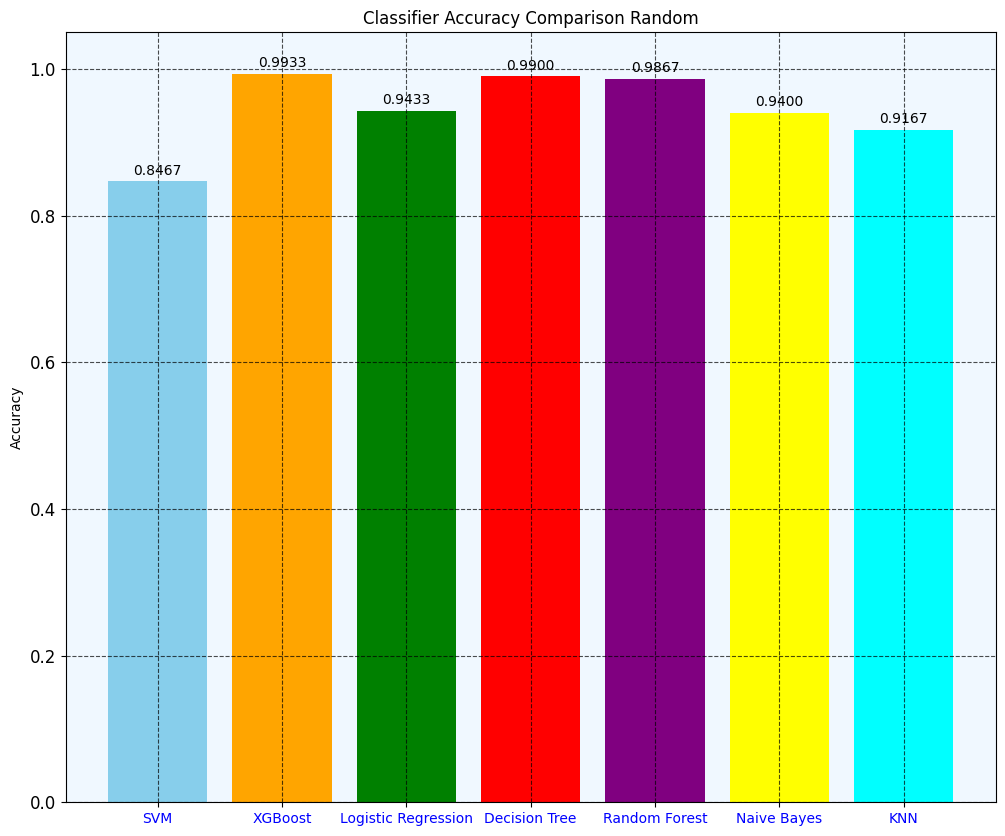

In [184]:
# Comparing Accuracy Of Random Taking Test Set

classifiers = ["SVM", "XGBoost", "Logistic Regression", "Decision Tree", "Random Forest", "Naive Bayes", "KNN"]
accuracies = [svm_output, xgb_output, lr_output, dt_output, rf_output, nb_output, knnoutput]
randomacc=accuracies
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'yellow', 'cyan']

plt.figure(figsize=(12, 10))
bars = plt.bar(classifiers, accuracies, color=colors)
plt.title('Classifier Accuracy Comparison Random')
plt.ylabel('Accuracy')

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, accuracy + 0.005, f'{accuracy:.4f}', ha='center', va='bottom')

plt.ylim(0, 1.05)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(True, linestyle='--', alpha=0.7, color='black')
plt.xticks(fontsize=10, color='blue')
plt.yticks(fontsize=12, color='black')
plt.show()

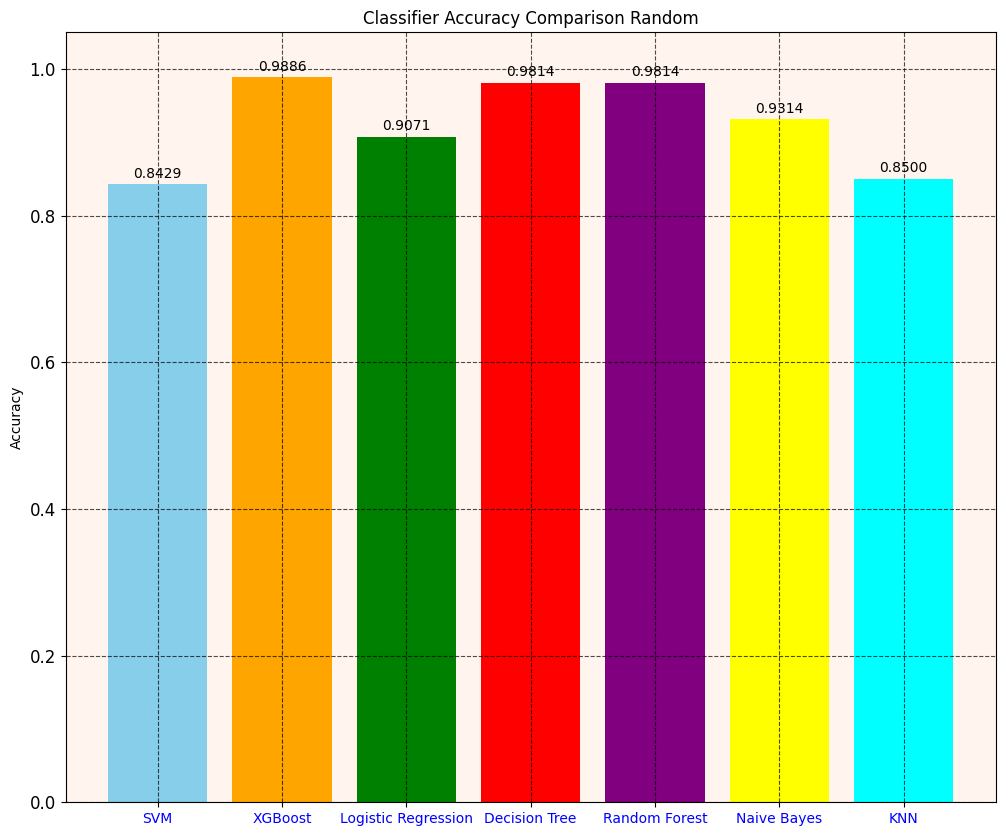

In [185]:
# Comparing Accuracy Of Mean Accuracy From 10 Fold Cross Validation

classifiers = ["SVM", "XGBoost", "Logistic Regression", "Decision Tree", "Random Forest", "Naive Bayes", "KNN"]
accuracies = [ms, mx, ml, md, mr, mn, mk]
crossacc=accuracies
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'yellow', 'cyan']

plt.figure(figsize=(12, 10))
bars = plt.bar(classifiers, accuracies, color=colors)
plt.title('Classifier Accuracy Comparison Random')
plt.ylabel('Accuracy')

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, accuracy + 0.005, f'{accuracy:.4f}', ha='center', va='bottom')

plt.ylim(0, 1.05)
plt.gca().set_facecolor('#FFF5EE')
plt.grid(True, linestyle='--', alpha=0.7, color='black')
plt.xticks(fontsize=10, color='blue')
plt.yticks(fontsize=12, color='black')
plt.show()

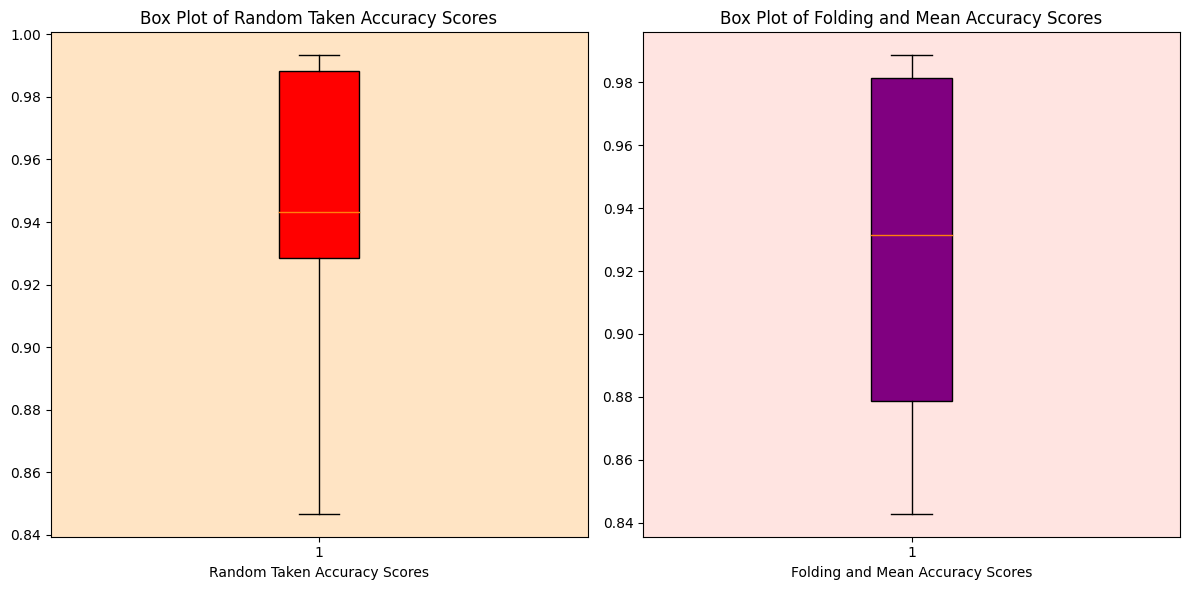

In [186]:
# Box Plotting Accuracy

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.gca().set_facecolor('#FFE4C4')
plt.boxplot(randomacc, patch_artist=True, boxprops=dict(facecolor='red'))
plt.xlabel('Random Taken Accuracy Scores')
plt.title('Box Plot of Random Taken Accuracy Scores')

plt.subplot(1, 2, 2)
plt.gca().set_facecolor('#FFE4E1')
plt.boxplot(crossacc, patch_artist=True, boxprops=dict(facecolor='purple'))
plt.xlabel('Folding and Mean Accuracy Scores')
plt.title('Box Plot of Folding and Mean Accuracy Scores')

plt.tight_layout()
plt.show()